In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
df=pd.read_csv("Amazon Sale Report.csv",encoding='latin1')

In [22]:
df.head()

,index,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Category,Size,Courier Status,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,B2B,fulfilled-by,New,PendingS
0,0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,T-shirt,S,On the Way,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,False,Easy Ship,NaN,NaN
1,1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,Shirt,3XL,Shipped,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,False,Easy Ship,NaN,NaN
2,2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Shirt,XL,Shipped,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,True,NaN,NaN,NaN
3,3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,Blazzer,L,On the Way,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,False,Easy Ship,NaN,NaN
4,4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,Trousers,3XL,Shipped,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,False,NaN,NaN,NaN


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128976 entries, 0 to 128975
Data columns (total 21 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   index               128976 non-null  int64  
 1   Order ID            128976 non-null  object 
 2   Date                128976 non-null  object 
 3   Status              128976 non-null  object 
 4   Fulfilment          128976 non-null  object 
 5   Sales Channel       128976 non-null  object 
 6   ship-service-level  128976 non-null  object 
 7   Category            128976 non-null  object 
 8   Size                128976 non-null  object 
 9   Courier Status      128976 non-null  object 
 10  Qty                 128976 non-null  int64  
 11  currency            121176 non-null  object 
 12  Amount              121176 non-null  float64
 13  ship-city           128941 non-null  object 
 14  ship-state          128941 non-null  object 
 15  ship-postal-code    128941 non-nul

In [24]:
df.shape

(128976, 21)

In [25]:
df.duplicated().value_counts()

,count
False,128808
True,168


In [26]:
df=df.drop_duplicates()
df.duplicated().value_counts()

,count
False,128808


In [27]:
df.isnull().sum()

,0
index,0
Order ID,0
Date,0
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Category,0
Size,0
Courier Status,0


In [28]:
df['Date'] = pd.to_datetime(df['Date'])

df.isnull().sum().sort_values(ascending=False)


/tmp/ipython-input-4220751563.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


,0
PendingS,128808
New,128808
fulfilled-by,89595
currency,7789
Amount,7789
ship-state,33
ship-city,33
ship-postal-code,33
ship-country,33
index,0


In [29]:
df['Amount'].fillna(0, inplace=True)
df.dropna(subset=['ship-state', 'Category'], inplace=True)


/tmp/ipython-input-2852456616.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Amount'].fillna(0, inplace=True)


In [30]:
df.describe()

,index,Date,Qty,Amount,ship-postal-code,New,PendingS
count,128775.000000,128775,128775.000000,128775.000000,128775.00000,0.0,0.0
mean,64564.787948,2022-05-12 12:19:14.348281344,0.904430,609.420426,463957.07107,NaN,NaN
min,0.000000,2022-03-31 00:00:00,0.000000,0.000000,110001.00000,NaN,NaN
25%,32371.500000,2022-04-20 00:00:00,1.000000,413.000000,382421.00000,NaN,NaN
50%,64569.000000,2022-05-10 00:00:00,1.000000,583.810000,500033.00000,NaN,NaN
75%,96772.500000,2022-06-04 00:00:00,1.000000,771.000000,600024.00000,NaN,NaN
max,128974.000000,2022-06-29 00:00:00,15.000000,5584.000000,989898.00000,NaN,NaN
std,37192.505842,NaN,0.313359,313.391228,191478.52940,NaN,NaN


In [31]:
#Sales Overview
total_sales = df['Amount'].sum()
total_sales


np.float64(78478115.39000002)

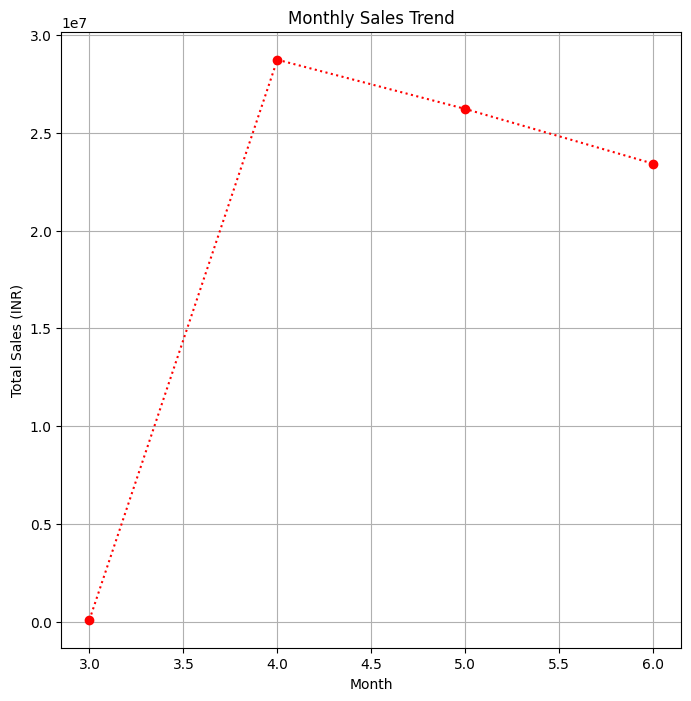

In [35]:
#Monthly Sales trend
monthly_sales = df.groupby(df['Date'].dt.month)['Amount'].sum()
plt.figure(figsize=(8,8))
plt.plot(monthly_sales,"o:r")
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales (INR)")
plt.grid(True)
plt.show()


In [36]:
#Product Analysis
df['Category'].value_counts().head(10)


,count
Category,
T-shirt,50207
Shirt,49786
Blazzer,15488
Trousers,10605
Perfume,1157
Wallet,926
Socks,439
Shoes,164
Watch,3


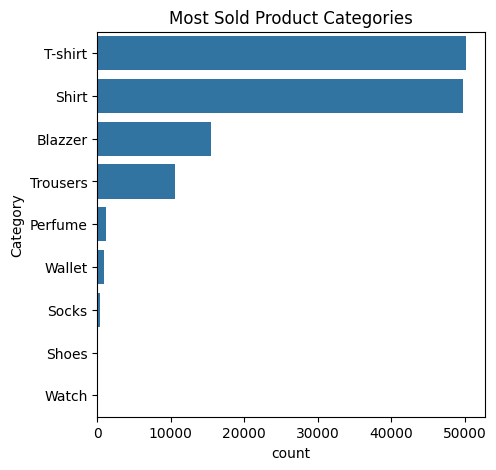

In [38]:
plt.figure(figsize=(5,5))
sns.countplot(y='Category', data=df, order=df['Category'].value_counts().index)
plt.title("Most Sold Product Categories")
plt.show()


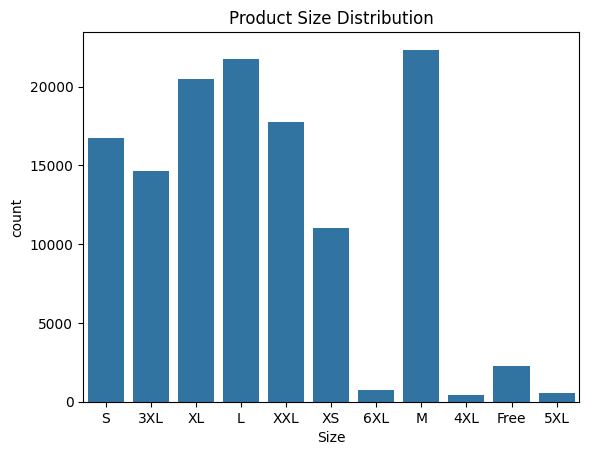

In [39]:
sns.countplot(x='Size', data=df)
plt.title("Product Size Distribution")
plt.show()


In [40]:
df['Fulfilment'].value_counts()


,count
Fulfilment,
Amazon,89575
Merchant,39200


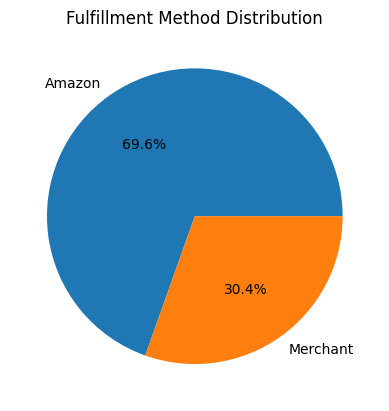

In [41]:
df['Fulfilment'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Fulfillment Method Distribution")
plt.ylabel("")
plt.show()


In [42]:
#Customer & Order Behavior
df['Status'].value_counts()


,count
Status,
Shipped,77697
Shipped - Delivered to Buyer,28708
Cancelled,18304
Shipped - Returned to Seller,1949
Shipped - Picked Up,973
Pending,658
Pending - Waiting for Pick Up,281
Shipped - Returning to Seller,145
Shipped - Out for Delivery,35


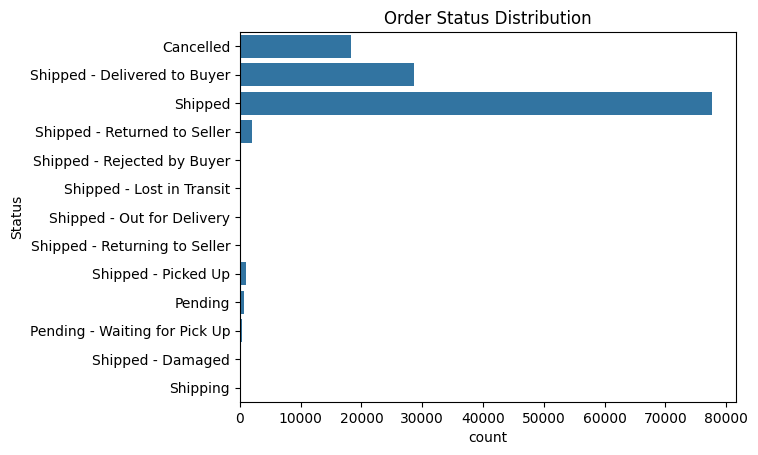

In [43]:
sns.countplot(y='Status', data=df)
plt.title("Order Status Distribution")
plt.show()


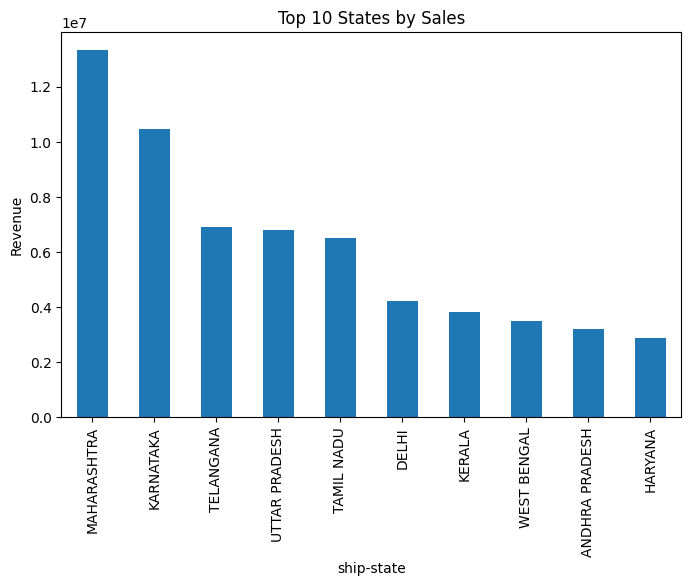

In [45]:
#Geographical Sales Analysis
state_sales = df.groupby('ship-state')['Amount'].sum().sort_values(ascending=False).head(10)
state_sales.plot(kind='bar', figsize=(8,5))
plt.title("Top 10 States by Sales")
plt.ylabel("Revenue")
plt.show()
